In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def tracker(img,corners):
    image = img.copy()
    crns = corners[0].reshape((4, 2))

    (topLeft, topRight, bottomRight, bottomLeft) = crns
    bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
    topLeft = (int(topLeft[0]), int(topLeft[1]))

    cx = int((topLeft[0] + bottomRight[0]) / 2.0)
    cy = int((topLeft[1] + bottomRight[1]) / 2.0)
    cv2.circle(image, (cx, cy), 4, (0, 0, 255), -1)

    if cx-cX < -1:
        xText = 'left'
    elif cx-cX > 1:
        xText = 'right'
    else:
        xText = 'center'

    if cy - cY < -1:
        yText = ' up'
    elif cy - cY > 1:
        yText = 'down'
    else:
        yText = 'center'

    cv2.putText(image, xText,(topLeft[0], topLeft[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(image, yText,(topLeft[0]+120, topLeft[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    top_left = (cx - 20, cy - 20)
    bottom_right = (cx + 20, cy + 20)
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    cv2.line(image, (cX, cY), (cx, cy), (255, 0, 0), 2)
    
    return image,cx,cy

In [3]:
# Parameters
aruco_type = "DICT_4X4_50"
arucoDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
arucoParams = cv2.aruco.DetectorParameters()

# Camera Parameters
intrinsic_camera = np.array(((580.18421199, 0., 306.32847071), (0., 581.93758236, 241.22427157), (0., 0., 1. )))
distortion = np.array((-3.30325200e-01, 1.96909151e+00, -7.17910236e-03, -5.94455010e-04, -4.54516181e+00))

In [4]:
cap = cv2.VideoCapture(0)
ret,img = cap.read()

h, w, _ = img.shape[::]
cX = w // 2
cY = h // 2
xText = 'center'
yText = 'center'

# frameCounter = 0

path = []

start_detection = False

# Function to handle mouse events
def mouse_callback(event, x, y, flags, param):
    global start_detection
    if event == cv2.EVENT_LBUTTONDOWN:
        if 20 <= x <= 120 and h - 50 <= y <= h - 20:
            start_detection = True
        elif 150 <= x <= 250 and h - 50 <= y <= h - 20:
            start_detection = False

# Create window and set mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', mouse_callback)

while cap.isOpened():
    
    ret,img = cap.read()
    
    cv2.circle(img, (cX, cY), 5, (0, 0, 255), -1)
    
    corners, ids, rejected = cv2.aruco.detectMarkers(img, arucoDict, parameters=arucoParams)
    
    # Add frameCounter Condition for direction ( frameCounter%5 == 0 ) 
    if len(corners) == 1 and start_detection:
        
        image,cx,cy = tracker(img,corners)
#         cv2.circle(image, (cx, cy), 1, (0, 0, 255), -1)
        
#         cv2.imshow('Marker', image)
        
        path.append([cx,w-cy])

        cX = cx
        cY = cy
    
    # Draw buttons
    cv2.rectangle(img, (20, h - 50), (120, h - 20), (0, 255, 0), -1)
    cv2.putText(img, 'Start', (30, h - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    
    cv2.rectangle(img, (150, h - 50), (250, h - 20), (0, 0, 255), -1)
    cv2.putText(img, 'Stop', (160, h - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    cv2.imshow('Image', img)
    
#     frameCounter += 1
    
    if cv2.waitKey(1) & 0xFF==27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [5]:
cap.release()
cv2.destroyAllWindows()

In [6]:
import pickle

# with open('paths/path.pkl', 'wb') as file:
#     pickle.dump(path, file)

with open('paths/path.pkl', 'rb') as file:
    loaded_path = pickle.load(file)

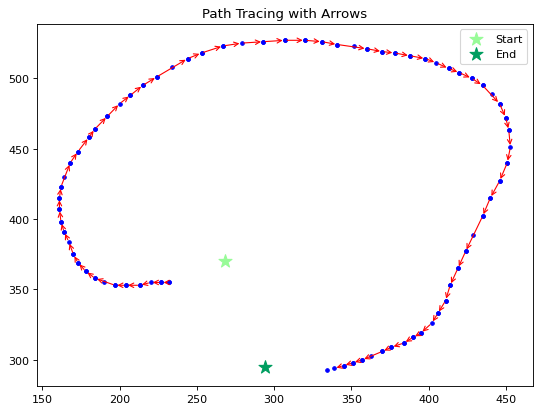

In [7]:
start_x, start_y = loaded_path[0]
end_x, end_y = loaded_path[-1]

plt.figure(figsize=(8, 6), dpi=80)

# Plot the path
for i, (x, y) in enumerate(loaded_path[30:-30]):
    plt.scatter(x, y, color='blue',s=10)
    
    # Add arrow every 2 points (adjust as needed)
    if i % 2 == 0 and i != 0:
        prev_x, prev_y = loaded_path[i+30 - 2]
        plt.annotate("", xy=(x, y), xytext=(prev_x, prev_y),
                     arrowprops=dict(arrowstyle="->", color='red', lw=1))

# Add blue star at the beginning and end
plt.scatter(start_x, start_y, color='#98FB98', marker='*', s=150, label='Start')
plt.scatter(end_x, end_y, color='#009E60', marker='*', s=150, label='End')

# Set labels and legend
plt.title('Path Tracing with Arrows')
plt.legend()

plt.show()

In [8]:
def D3tracker(img, corners, matrix_coefficients, distortion_coefficients):
    image = img.copy()
    
    crns = corners[0].reshape((4, 2))

    (topLeft, topRight, bottomRight, bottomLeft) = crns
    bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
    topLeft = (int(topLeft[0]), int(topLeft[1]))

    cx = int((topLeft[0] + bottomRight[0]) / 2.0)
    cy = int((topLeft[1] + bottomRight[1]) / 2.0)
    cv2.circle(image, (cx, cy), 4, (0, 0, 255), -1)

    if cx-cX < -1:
        xText = 'left'
    elif cx-cX > 1:
        xText = 'right'
    else:
        xText = 'center'

    if cy - cY < -1:
        yText = ' up'
    elif cy - cY > 1:
        yText = 'down'
    else:
        yText = 'center'

    cv2.putText(image, xText,(topLeft[0], topLeft[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(image, yText,(topLeft[0]+120, topLeft[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    rvec, tvec, markerPoints = cv2.aruco.estimatePoseSingleMarkers(corners[0], 5, matrix_coefficients,
                                                               distortion_coefficients)

    cz = (round(tvec[0][0][2],2) - 10) / (50 - 10)

    if cz - cZ < -0.01:
        zText = 'forward'
    elif cz - cZ > 0.01:
        zText = 'backward'
    else:
        zText = 'center'
        
    cv2.putText(image, zText,(topLeft[0]+220, topLeft[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    cv2.putText(image, f'X: {round(tvec[0][0][0],2)} Y: {round(tvec[0][0][1],2)} Z: {round(tvec[0][0][2],2)}',(50, 50), cv2.FONT_HERSHEY_SIMPLEX,
        0.5, (0, 255, 0), 2)

    cv2.drawFrameAxes(image, matrix_coefficients, distortion_coefficients, rvec, tvec, 5)  

    return image,cx,cy,cz

In [9]:
cap = cv2.VideoCapture(0)
ret,img = cap.read()

h, w, _ = img.shape[::]
cX = w // 2
cY = h // 2
cZ = 20
xText = 'center'
yText = 'center'
zText = 'center'

path = []
# frameCounter = 0

start_detection = False

# Function to handle mouse events
def mouse_callback(event, x, y, flags, param):
    global start_detection
    if event == cv2.EVENT_LBUTTONDOWN:
        if 20 <= x <= 120 and h - 50 <= y <= h - 20:
            start_detection = True
        elif 150 <= x <= 250 and h - 50 <= y <= h - 20:
            start_detection = False

# Create window and set mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', mouse_callback)

while cap.isOpened():
    
    ret,img = cap.read()
    
    cv2.circle(img, (cX, cY), 5, (0, 0, 255), -1)
    
    corners, ids, rejected = cv2.aruco.detectMarkers(img, arucoDict, parameters=arucoParams)
    
    # Add frameCounter Condition for direction ( frameCounter%5 == 0 ) 
    if len(corners) == 1 and start_detection:
        
        image,cx,cy,cz = D3tracker(img,corners,intrinsic_camera, distortion)
        
#         cv2.circle(image, (cx, cy), 1, (0, 0, 255), -1)
        
#         cv2.imshow('Marker', image)
        
        path.append([cx,w-cy,int(cz*100)])

        cX = cx
        cY = cy
        cZ = cz
    
    # Draw buttons
    cv2.rectangle(img, (20, h - 50), (120, h - 20), (0, 255, 0), -1)
    cv2.putText(img, 'Start', (30, h - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    
    cv2.rectangle(img, (150, h - 50), (250, h - 20), (0, 0, 255), -1)
    cv2.putText(img, 'Stop', (160, h - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)


    cv2.imshow('Image', img)
    
#     frameCounter += 1
    
    if cv2.waitKey(1) & 0xFF==27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [10]:
cap.release()
cv2.destroyAllWindows()

In [11]:
import pickle

# with open('paths/D3path.pkl', 'wb') as file:
#     pickle.dump(path, file)

with open('paths/D3path.pkl', 'rb') as file:
    loaded_path = pickle.load(file)

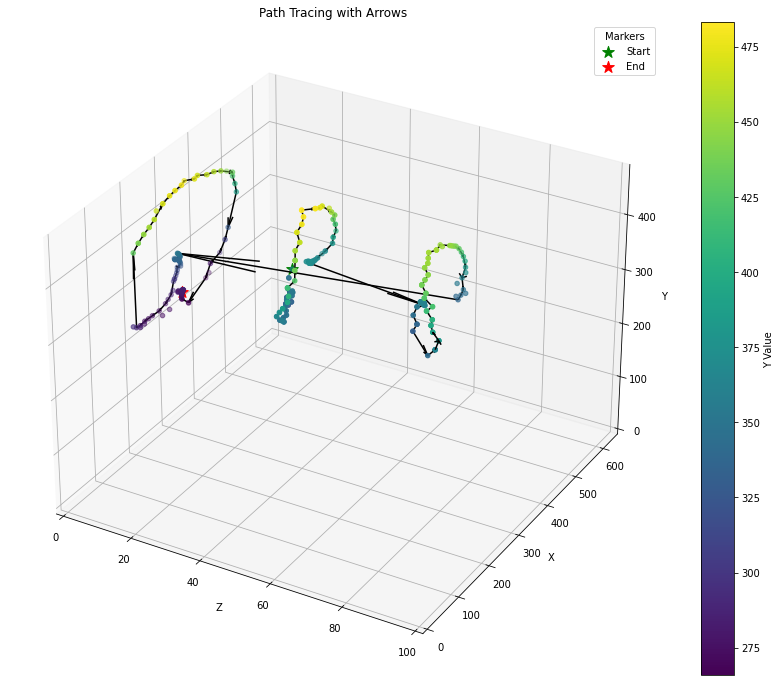

In [14]:

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

x_coords, y_coords, z_coords = zip(*loaded_path)

# Plot points with colormap based on z values
sc = ax.scatter(z_coords, x_coords, y_coords, c=y_coords, cmap=plt.cm.viridis, marker='o')

# Add a colorbar to explain z values
cbar = fig.colorbar(sc)
cbar.set_label('Y Value')

# Set the limits for x, y, and z axes
ax.set_xlim(0, 100)
ax.set_ylim(0, 640)
ax.set_zlim(0, 480)

# Plot start and end points
ax.scatter(loaded_path[0][2], loaded_path[0][0], loaded_path[0][1], c='green', marker='*', s=150, label='Start')
ax.scatter(loaded_path[-1][2], loaded_path[-1][0], loaded_path[-1][1], c='red', marker='*', s=150, label='End')

# Plot arrows after every 30 points
for i,(x,y,z) in enumerate(loaded_path[30:-30]):
    
    if i % 2 == 0 and i != 0:
        prev_x, prev_y,prev_z = loaded_path[i+30 - 2]
        ax.quiver(prev_z, prev_x, prev_y, z - prev_z, x - prev_x, y - prev_y,
              color='black', arrow_length_ratio=0.3)

ax.set_xlabel('Z')
ax.set_ylabel('X')  
ax.set_zlabel('Y')  
ax.set_title('Path Tracing with Arrows')

legend = ax.legend(loc='upper right', fontsize=10)
legend.set_title('Markers')

plt.show()